# COMP5310 Project Stage 2 Code

## Group Component 1

In [1]:
# install the required packages
%pip install scikit-learn
%pip install pandas
%pip install numpy==1.26.4
%pip install scipy==1.11.4
%pip install matplotlib seaborn
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [2]:
# import the required packages
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Preliminary Changes to Data

In [59]:
# load the data and split it into features and labels
df = pd.read_csv('Group1_Activity9_FinalCleanData.csv')

# 对 MarketValue 进行自然对数变换
labels_logged = np.expm1(df['MarketValue'])  # 使用 log1p 可以避免 log(0) 的问题

# labels = df['MarketValue']
features = df.drop(columns=['MarketValue'])

# drop the columns that relate to market
features_without_market_related_factors = features.drop(columns=['ReleaseClause', 'WeeklyWage'])

# drop the columns that relate to market and comprehensive evaluation
features_without_market_and_comprehensive_evaluation = features.drop(columns=['ReleaseClause', 'Rating in Scale 100', 'Potential in Scale 100', 'BestOverall', 'WeeklyWage'])

### Data split for train/validation/test sets

In [60]:
# split the data into training, validation and test sets
train_feature, rest_feature, train_labels_logged, rest_labels_logged = train_test_split(features, labels_logged, test_size=0.3, random_state=42)
validation_feature, test_feature, validation_labels_logged, test_labels_logged = train_test_split(rest_feature, rest_labels_logged, test_size=0.5, random_state=42)

train_feature_without_market_and_comprehensive_evaluation, rest_feature_without_market_and_comprehensive_evaluation, train_labels_without_market_and_comprehensive_evaluation_logged, rest_labels_without_market_and_comprehensive_evaluation_logged = train_test_split(features_without_market_and_comprehensive_evaluation, labels_logged, test_size=0.3, random_state=42)
validation_feature_without_market_and_comprehensive_evaluation, test_feature_without_market_and_comprehensive_evaluation, validation_labels_without_market_and_comprehensive_evaluation_logged, test_labels_without_market_and_comprehensive_evaluation_logged = train_test_split(rest_feature_without_market_and_comprehensive_evaluation, rest_labels_without_market_and_comprehensive_evaluation_logged, test_size=0.5, random_state=42)


In [61]:
# check the shape of the data
print('train_feature:')
print(train_feature.shape)
print('validation_feature:')
print(validation_feature.shape)
print('test_feature:')
print(test_feature.shape)
print('--------------------------------------------------------')
print('train_feature_without_market_and_comprehensive_evaluation')
print(train_feature_without_market_and_comprehensive_evaluation.shape)
print('validation_feature_without_market_and_comprehensive_evaluation')
print(validation_feature_without_market_and_comprehensive_evaluation.shape)
print('test_feature_without_market_and_comprehensive_evaluation')
print(test_feature_without_market_and_comprehensive_evaluation.shape)

train_feature:
(10048, 93)
validation_feature:
(2153, 93)
test_feature:
(2154, 93)
--------------------------------------------------------
train_feature_without_market_and_comprehensive_evaluation
(10048, 88)
validation_feature_without_market_and_comprehensive_evaluation
(2153, 88)
test_feature_without_market_and_comprehensive_evaluation
(2154, 88)


----------------------- End of Group Component1 -----------------------

# Individual Component - Unikey: cjia0865

Title: Gradient Boosting Decision Trees (GDBT)

Unikey: cjia0865

## Data Processing

In [24]:
# 检查缺失值
print(features_without_market_and_comprehensive_evaluation.isnull().sum())

Age                        0
Height                     0
Weight                     0
PreferredFoot              0
AttackingSkills            0
CrossingAbility            0
FinishingAbility           0
HeadingAccuracy            0
ShortPassing               0
Volleys                    0
SkillAttributes            0
Dribbling                  0
CurveAbility               0
FreeKickAccuracy           0
LongPassing                0
BallControl                0
MovementSkills             0
Acceleration               0
SprintSpeed                0
Agility                    0
Reactions                  0
Balance                    0
PowerSkills                0
ShotPower                  0
JumpingAbility             0
Stamina                    0
Strength                   0
LongShots                  0
MentalAttributes           0
Aggression                 0
Interceptions              0
Positioning                0
Vision                     0
Penalties                  0
Composure     

## Initial Model Development and Evaluation

### 使用features初始化并训练模型

In [62]:
# initial
dt_regressor = DecisionTreeRegressor(random_state=42)

# training by train set
dt_regressor.fit(train_feature, train_labels_logged)

DecisionTreeRegressor(random_state=42)

### 验证模型

In [63]:
# 在验证集上进行预测
validation_predictions_logged = dt_regressor.predict(validation_feature)

validation_predictions = np.log1p(validation_predictions_logged)

validation_labels = np.log1p(validation_labels_logged)

# 计算评估指标
mse = mean_squared_error(validation_labels, validation_predictions)
r2 = r2_score(validation_labels, validation_predictions)

print("验证集均方误差:", mse)
print("验证集R²得分:", r2)

验证集均方误差: 0.022240867868263153
验证集R²得分: 0.9850965095096978


### 使用 features_without_market_and_comprehensive_evaluation初始化并训练模型

In [64]:
dt_regressor_wo_market = DecisionTreeRegressor(random_state=42)

dt_regressor_wo_market.fit(train_feature_without_market_and_comprehensive_evaluation,train_labels_without_market_and_comprehensive_evaluation_logged)

DecisionTreeRegressor(random_state=42)

### 验证模型

In [65]:
validation_predictions_wo_market_logged = dt_regressor_wo_market.predict(validation_feature_without_market_and_comprehensive_evaluation)
validation_predictions_wo_market = np.log1p(validation_predictions_wo_market_logged)

validation_labels_without_market_and_comprehensive_evaluation = np.log1p(validation_labels_without_market_and_comprehensive_evaluation_logged)

mse_wo_market = mean_squared_error(validation_labels_without_market_and_comprehensive_evaluation,validation_predictions_wo_market)
r2_wo_market = r2_score(validation_labels_without_market_and_comprehensive_evaluation, validation_predictions_wo_market)

print("验证集均方误差:", mse_wo_market)
print("验证集R²得分:", r2_wo_market)

验证集均方误差: 0.24278073816805743
验证集R²得分: 0.8373138834353081


## Model Optimization

### 超参数调优

In [66]:
# 定义参数网格
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 初始化网格搜索
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# 训练网格搜索
grid_search.fit(train_feature, train_labels_logged)

# 最佳参数
print("找到的最佳参数:", grid_search.best_params_)

# 最佳估计器
best_dt_regressor = grid_search.best_estimator_


找到的最佳参数: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [67]:
# 使用最佳模型在验证集上进行预测
validation_predictions_best_logged = best_dt_regressor.predict(validation_feature)
validation_predictions_best = np.log1p(validation_predictions_best_logged)

validation_labels = np.log1p(validation_labels_logged)

# 计算评估指标
mse_best = mean_squared_error(validation_labels, validation_predictions_best)
r2_best = r2_score(validation_labels, validation_predictions_best)

print("调优后验证集均方误差:", mse_best)
print("调优后验证集R²得分:", r2_best)


调优后验证集均方误差: 0.019820464220034518
调优后验证集R²得分: 0.9867184094718636


### 对 features_without_market_and_comprehensive_evaluation 进行调优

In [68]:
grid_search_wo_market = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search_wo_market.fit(train_feature_without_market_and_comprehensive_evaluation, train_labels_without_market_and_comprehensive_evaluation_logged)

# 最佳参数
print("找到的最佳参数:", grid_search_wo_market.best_params_)

# 最佳估计器
best_dt_regressor_wo_market = grid_search_wo_market.best_estimator_

validation_predictions_best_wo_best_logged = best_dt_regressor_wo_market.predict(validation_feature_without_market_and_comprehensive_evaluation)
validation_predictions_best_wo_best = np.log1p(validation_predictions_best_wo_best_logged)

validation_labels_without_market_and_comprehensive_evaluation = np.log1p(validation_labels_without_market_and_comprehensive_evaluation_logged)

mse_best_wo_market = mean_squared_error(validation_labels_without_market_and_comprehensive_evaluation,validation_predictions_best_wo_best)
r2_best_wo_market = r2_score(validation_labels_without_market_and_comprehensive_evaluation,validation_predictions_best_wo_best)

print("调优后验证集均方误差:", mse_best_wo_market)
print("调优后验证集R²得分:", r2_best_wo_market)

找到的最佳参数: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
调优后验证集均方误差: 0.21123782557392962
调优后验证集R²得分: 0.8584506259701544


## Model results

### 测试集评估最终模型

#### 使用features

In [80]:
test_predictions_logged = best_dt_regressor.predict(test_feature)
test_predictions = np.log1p(test_predictions_logged)
test_labels = np.log1p(test_labels_logged)

mse_test = mean_squared_error(test_labels,test_predictions)
r2_test = r2_score(test_labels,test_predictions)

print("测试集均方误差:", mse_test)
print("测试集R²得分:", r2_test)

测试集均方误差: 0.018976626597460043
测试集R²得分: 0.9885673186319599


#### 使用features_without_market_and_comprehensive_evaluation

In [81]:
test_predictions_wo_market_logged = best_dt_regressor_wo_market.predict(test_feature_without_market_and_comprehensive_evaluation)
test_predictions_wo_market = np.log1p(test_predictions_wo_market_logged)

test_labels_without_market_and_comprehensive_evaluation = np.log1p(test_labels_without_market_and_comprehensive_evaluation_logged)

mse_test_wo_market = mean_squared_error(test_labels_without_market_and_comprehensive_evaluation,test_predictions_wo_market)
r2_test_wo_market = r2_score(test_labels_without_market_and_comprehensive_evaluation,test_predictions_wo_market)

print("测试集均方误差:", mse_test_wo_market)
print("测试集R²得分:", r2_test_wo_market)

测试集均方误差: 0.19444255610869382
测试集R²得分: 0.8828559029203061


### 特征重要性分析

#### 使用features

c:\Users\jacob\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20351 (\N{CJK UNIFIED IDEOGRAPH-4F7F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jacob\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jacob\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jacob\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jacob\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  fig.canvas.print_figure(bytes_

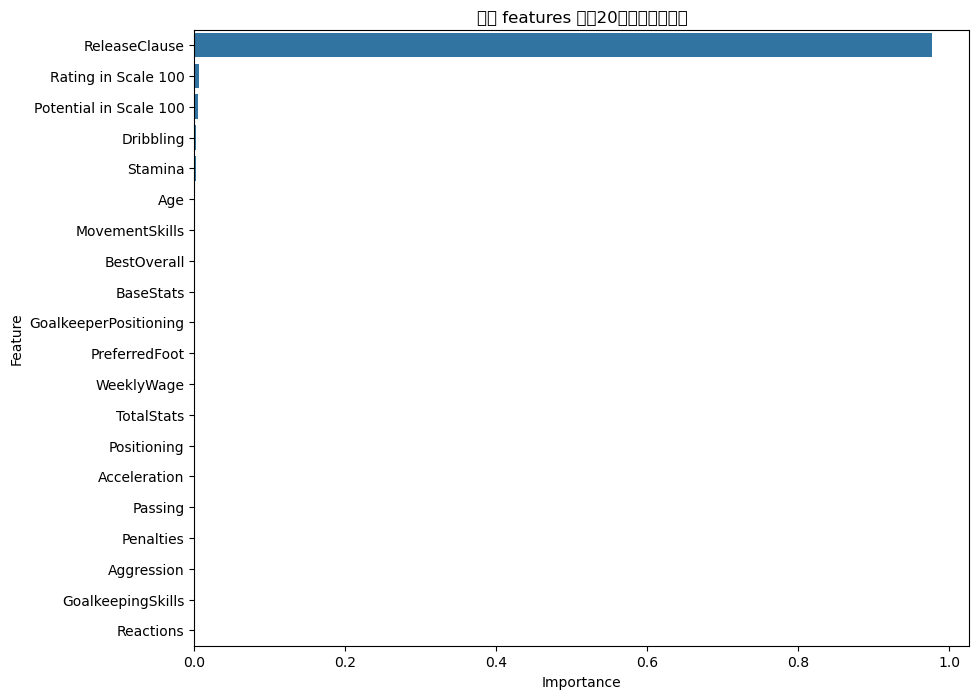

In [75]:
# 获取特征重要性
importances = best_dt_regressor.feature_importances_

# 创建 DataFrame
feature_importances = pd.DataFrame({
    'Feature': train_feature.columns,
    'Importance': importances
})

# 排序
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 可视化
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20))
plt.title('使用 features 的前20个特征的重要性')
plt.show()

#### 使用 features_without_market_and_comprehensive_evaluation

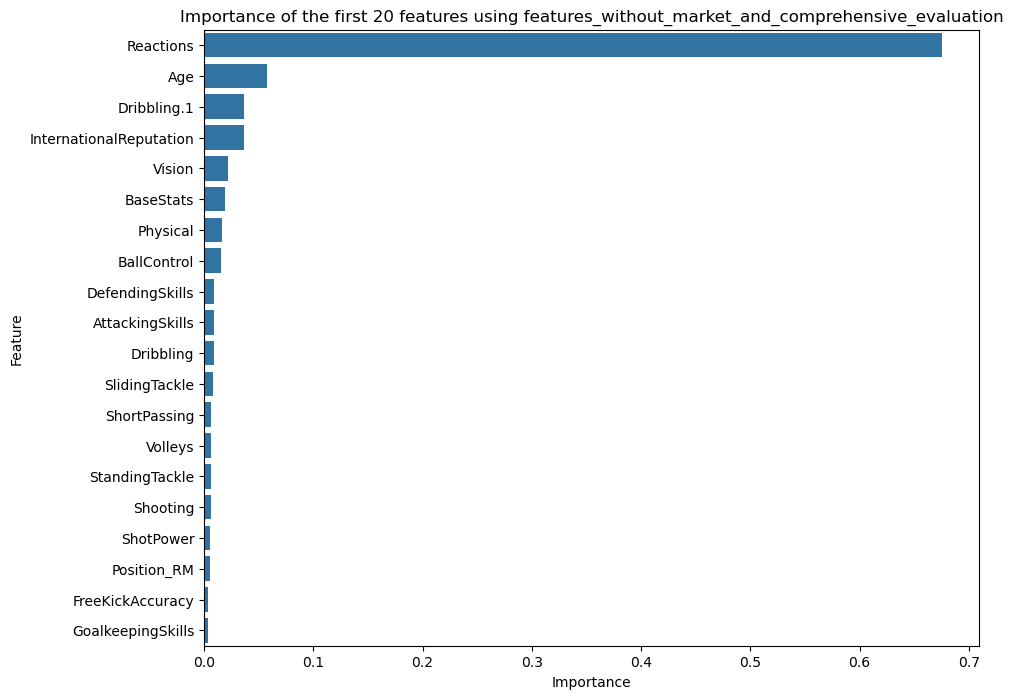

In [76]:
importances_wo_market = best_dt_regressor_wo_market.feature_importances_

feature_importances_wo_market = pd.DataFrame({
    'Feature': train_feature_without_market_and_comprehensive_evaluation.columns,
    'Importance': importances_wo_market
})

feature_importances_wo_market = feature_importances_wo_market.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_wo_market.head(20))
plt.title('Importance of the first 20 features using features_without_market_and_comprehensive_evaluation')
plt.show()

### 对于market value的预测

In [77]:
# 在测试集上进行预测
final_predictions_logged = best_dt_regressor.predict(test_feature)

final_predictions = np.log1p(final_predictions_logged)

test_labels_original = np.log1p(test_labels_logged)

# 将预测值保存到 DataFrame 中
final_results = pd.DataFrame({
    'Actual Market Value': test_labels_logged,
    'Predicted Market Value': final_predictions_logged
})

# 显示预测结果
print("\n使用 features 的最终 Market Value 预测：")
print(final_results.head())

#final_results.to_csv('final_predictions_features.csv1', index=False)


使用 features 的最终 Market Value 预测：
       Actual Market Value  Predicted Market Value
5044              325000.0            3.714286e+05
9955              900000.0            9.000000e+05
12548             250000.0            3.250000e+05
740             12500000.0            1.285714e+07
9763              900000.0            9.000000e+05


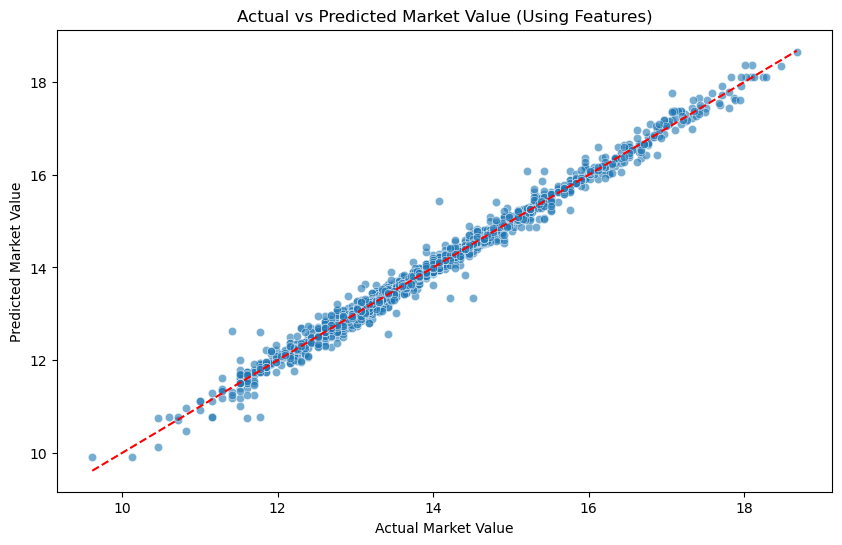

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制使用 features 的模型的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_labels_original, y=final_predictions, alpha=0.6)
plt.plot([min(test_labels_original), max(test_labels_original)], [min(test_labels_original), max(test_labels_original)], color='red', linestyle='--')  # 理想情况的对角线
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs Predicted Market Value (Using Features)')
plt.show()

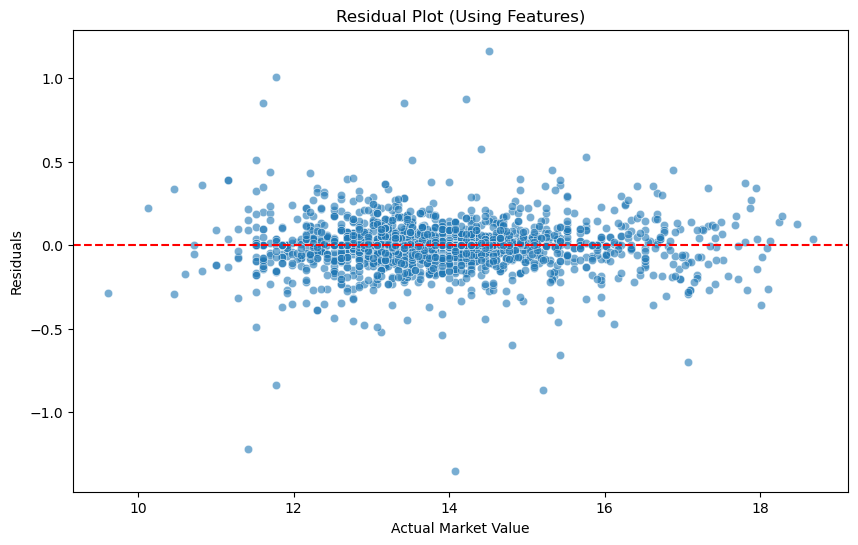

In [79]:
# 计算残差
residuals = test_labels_original - final_predictions

# 绘制残差图
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_labels_original, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # 零残差参考线
plt.xlabel('Actual Market Value')
plt.ylabel('Residuals')
plt.title('Residual Plot (Using Features)')
plt.show()

In [55]:
final_predictions_wo_market = best_dt_regressor_wo_market.predict(test_feature_without_market_and_comprehensive_evaluation)

# 将预测值保存到 DataFrame 中
final_results_wo_market = pd.DataFrame({
    'Actual Market Value': test_labels_without_market_and_comprehensive_evaluation,
    'Predicted Market Value': final_predictions_wo_market
})

# 显示预测结果
print("\n使用 features_without_market_and_comprehensive_evaluation 的最终 Market Value 预测：")
print(final_results_wo_market.head())


使用 features_without_market_and_comprehensive_evaluation 的最终 Market Value 预测：
       Actual Market Value  Predicted Market Value
5044             12.691584                2.640014
9955             13.710151                2.623022
12548            12.429220                2.631816
740              16.341239                2.889615
9763             13.710151                2.674167


In [54]:
# 绘制使用 features_without_market_and_comprehensive_evaluation 的模型的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_labels_original_wo, y=final_predictions_wo, alpha=0.6)
plt.plot([min(test_labels_original_wo), max(test_labels_original_wo)], [min(test_labels_original_wo), max(test_labels_original_wo)], color='red', linestyle='--')  # 理想情况的对角线
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs Predicted Market Value (Using Features Without Market & Comprehensive Evaluation)')
plt.show()

NameError: name 'test_labels_original_wo' is not defined

<Figure size 1000x600 with 0 Axes>

----------------------- End of Individual Component - Unikey: jjia0646 -----------------------

## Group Component2

### Optimal Model Comparison

### Final Model Recommendation

----------------------- End of Group Component 2 -----------------------